In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from setuptools.command.rotate import rotate
from scipy import stats
import numpy as np

plt.style.use("ggplot")
plt.rcParams.update({
    "font.size": 12,
})

In [11]:
coffee_chains = ["Highlands+Coffee", "Phuc+Long+Coffee", "Starbucks"]
cities = ["Hanoi", "Ho+Chi+Minh+City"]

dfs = {}

for chain in coffee_chains:
    for city in cities:
        key = f"{chain}_{city}"
        path = f"../data/coffee-chains/{chain}_{city}.csv"

        df = pd.read_csv(path)

        group_cols = [col for col in df.columns if col != "info"]
        df = df.groupby(group_cols, as_index=False).first()

        dfs[key] = df

In [2]:
coffee_chains = ["Highlands+Coffee", "Phuc+Long+Coffee", "Starbucks"]

prices_df = {}

for chain in coffee_chains:
    price_df = pd.read_csv(f"../data/coffee-chains/{chain}+Prices.csv")
    prices_df[chain] = price_df

In [3]:
for chain, price_df in prices_df.items():
    print(f"{chain.replace('+', ' ')}\n{'=' * len(chain)}")
    display(price_df.describe())

Highlands Coffee


,price
count,93.000000
mean,47473.118280
std,12722.447978
min,29000.000000
25%,39000.000000
50%,49000.000000
75%,55000.000000
max,75000.000000


Phuc Long Coffee


,price
count,105.000000
mean,53200.000000
std,10745.661021
min,20000.000000
25%,45000.000000
50%,55000.000000
75%,59000.000000
max,70000.000000


Starbucks


,price
count,73.000000
mean,71575.342466
std,18025.381648
min,30000.000000
25%,60000.000000
50%,70000.000000
75%,80000.000000
max,115000.000000


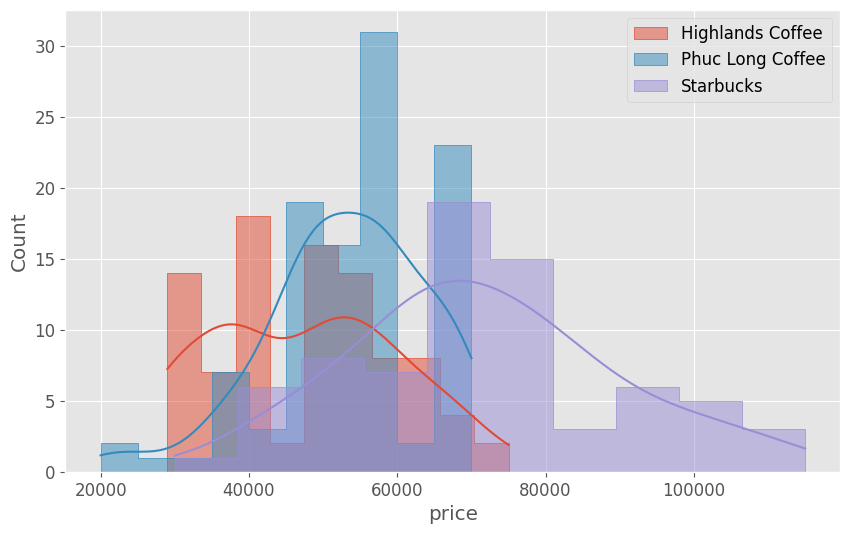

In [4]:
plt.figure(figsize=(10, 6))

for chain, price_df in prices_df.items():
    sns.histplot(
        price_df["price"], label=chain.replace("+", " "),
        bins=10, kde=True, element="step",
    )

plt.legend()

plt.show()

In [10]:
size = "M"
confidence = 95

print(f"Size: {size}\n{'=' * 40}")

for chain, price_df in prices_df.items():
    size_filtered = price_df[price_df["size"] == size]
    prices = size_filtered["price"].dropna()

    n = len(prices)
    mean_price = prices.mean()
    std_price = prices.std()
    
    ci_upper, ci_lower = stats.t.interval(
        confidence=confidence / 100,
        df=n - 1,
        loc=mean_price,
        scale=std_price / np.sqrt(n),
    )
    
    print(f"({chain.replace('+', ' ')}) E[Price] = {mean_price:.2f}; {confidence}% CI = [{ci_upper:.2f}, {ci_lower:.2f}]")

Size: M
(Highlands Coffee) E[Price] = 50500.00; 95% CI = [46392.95, 54607.05]
(Phuc Long Coffee) E[Price] = 51590.91; 95% CI = [48920.00, 54261.82]
(Starbucks) E[Price] = 68518.52; 95% CI = [63526.29, 73510.74]


In [24]:
city = "Ho+Chi+Minh+City"

avg_ratings = []
mean_prices = []

for chain in coffee_chains:
    avg_rating = dfs[f"{chain}_{city}"]["avg_rating"].mean()
    mean_price = prices_df[chain]["price"].mean()

    avg_ratings.append(avg_rating)
    mean_prices.append(mean_price)

corr, p_value = stats.pearsonr(avg_ratings, mean_prices)
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.3f}")

Pearson correlation: 0.74, p-value: 0.468


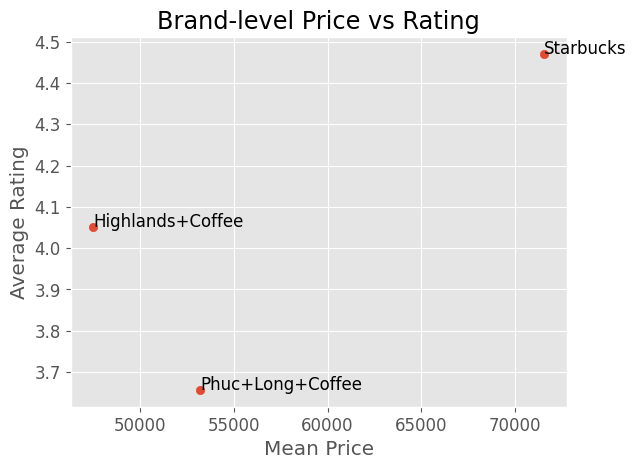

In [26]:
plt.scatter(mean_prices, avg_ratings)
for i, brand in enumerate(coffee_chains):
    plt.text(mean_prices[i], avg_ratings[i], brand)

plt.xlabel("Mean Price")
plt.ylabel("Average Rating")
plt.title("Brand-level Price vs Rating")
plt.show()
